<a href="https://colab.research.google.com/github/chinmayhandi/chinmay/blob/chinmay/CIE_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Load the Titanic dataset and import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### 2. Perform Exploratory Data Analysis (EDA)

In [2]:
# Central Tendency for 'age'
print("Age - Mean:", df['age'].mean())
print("Age - Median:", df['age'].median())
print("Age - Mode:", df['age'].mode()[0])

# Central Tendency for 'fare'
print("Fare - Mean:", df['fare'].mean())
print("Fare - Median:", df['fare'].median())
print("Fare - Mode:", df['fare'].mode()[0])


Age - Mean: 29.69911764705882
Age - Median: 28.0
Age - Mode: 24.0
Fare - Mean: 32.204207968574636
Fare - Median: 14.4542
Fare - Mode: 8.05


### 3. Replace values of 'survived' column (0→Not Survived, 1→Survived) and Plot bar chart of 'survived' & 'pclass'

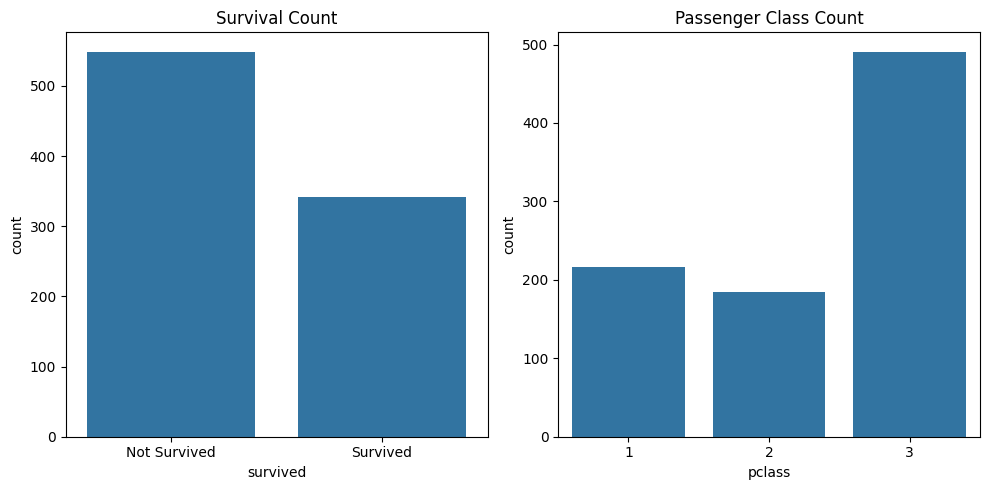

In [8]:
# Replace values in 'survived' column
df['survived'] = df['survived'].map({0: 'Not Survived', 1: 'Survived'})

# Plot bar chart
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='survived', data=df)
plt.title("Survival Count")

plt.subplot(1, 2, 2)
sns.countplot(x='pclass', data=df)
plt.title("Passenger Class Count")

plt.tight_layout()
plt.show()


### 4. Find and Fill Null Values with Mean

In [4]:
# Check for null values
print(df.isnull().sum())

# Fill nulls in 'age' and 'fare' with their respective means
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

# Verify again
print(df.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


/tmp/ipython-input-1200611324.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-1200611324.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

### 5. Detect Outliers using Z-score and plot Boxplot

Number of outliers: 27


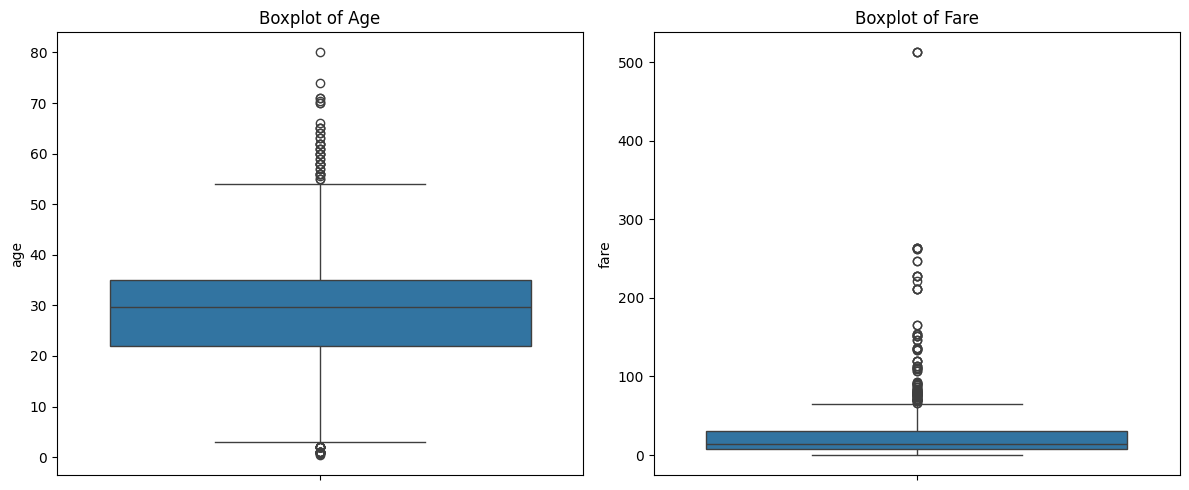

In [5]:
# Z-score method to detect outliers for 'age' and 'fare'
df_numeric = df[['age', 'fare']]
z_scores = np.abs(zscore(df_numeric))

# Rows with any z-score > 3 are considered outliers
outliers = (z_scores > 3).any(axis=1)
print("Number of outliers:", outliers.sum())

# Visualize using boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['fare'])
plt.title("Boxplot of Fare")

plt.tight_layout()
plt.show()
